Coding Assignment 1:
Name: Rahul Malu
Roll: 17IE10025

What I have done:
1. Import all libraries
2. read the zipped files as input and read into image arrays
3. Did one hot coding for all the labebelled data.
4. sorted the data accoring to their filename("digit_1.jpg") was stored at 1st position.
5. Found the mean shape of all the image and resized all the images to the mean size.
6. Used keras libraries to build a CNN model and put early stopping criteria.
7. After model was built , split the train and test data in ration 1:10
8. Calculated the complexity of model by printing the number of parameters of the model.
9. Calculated the loss and accuracy of the model.

In [0]:
import PIL

In [11]:
%pylab
import glob
import scipy.ndimage
from scipy.ndimage.interpolation import zoom
#from scipy.misc import imresize
import pandas as pd
import seaborn as sns
from PIL import Image
import cv2
sns.set_style('white')
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [40]:
import zipfile
#from google.colab import files
#uploaded=files.upload()
z1 = zipfile.ZipFile(r"\input\BDRW_train\BDRW_train_1.zip","r")
for name1 in z1.namelist():
    z1.extract(name1)
z2 = zipfile.ZipFile(r"\input\BDRW_train\BDRW_train_2.zip","r")
for name2 in z2.namelist():
    z2.extract(name2)

FileNotFoundError: ignored

In [0]:
labels = pd.read_excel('BDRW_train_2/labels.xls')
labels.columns = ['digit', 'label']

In [14]:
labels.head()


,digit,label
0,digit_1,4
1,digit_2,2
2,digit_3,3
3,digit_4,1
4,digit_5,2


In [0]:
train = [f for f in glob.glob("BDRW_train_1/*")]

In [16]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   digit   1392 non-null   object
 1   label   1392 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.9+ KB


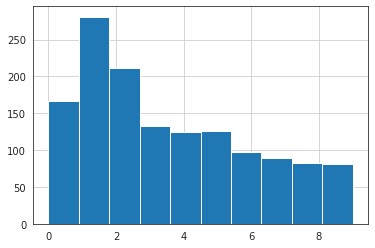

In [17]:
labels.label.hist()

In [18]:
dummies = pd.get_dummies(labels, columns = ['label'], )
one_hot_labels =array(dummies.drop('digit', axis = 1))
one_hot_labels.shape


(1392, 10)

In [0]:
image_list = []
# bring in order according to labels.xls
for filename in sorted(glob.glob('BDRW_train_1/*.jpg'), key=lambda a: int(a.split("_")[-1].split('.')[0]))[1:]: #because digit_0 not in labels
    im=imread(filename)
    image_list.append(array(im))
for filename in sorted(glob.glob('BDRW_train_2/*.jpg'), key=lambda a: int(a.split("_")[-1].split('.')[0]))[:]:
    im=imread(filename)
    image_list.append(array(im))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1392 + 1) instead
  after removing the cwd from sys.path.


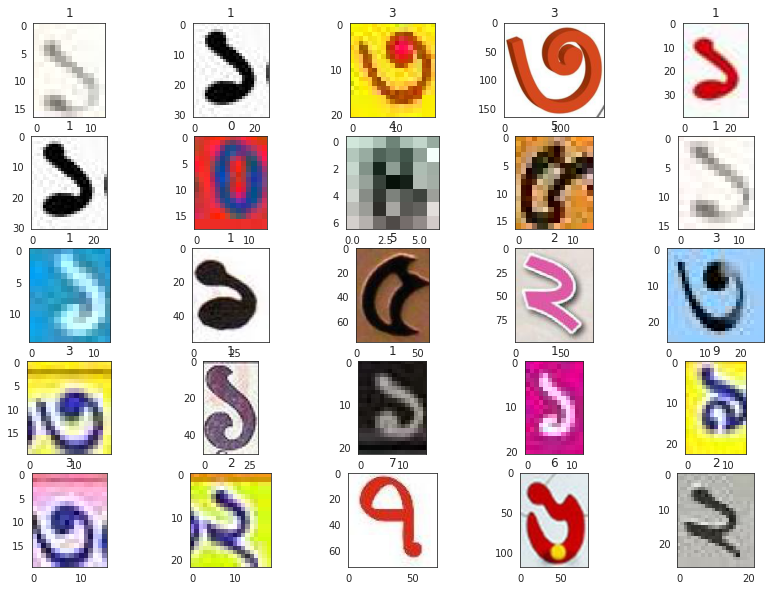

In [20]:
fig, ax = subplots(5,5, figsize = (14, 10))
for x in range(5):
    for y in range(5):
        rn = random_integers(0, len(image_list))
        ax[x,y].imshow(image_list[rn])
        ax[x,y].set_title(labels.label.iloc[rn])
show()

(26, 14, 3)


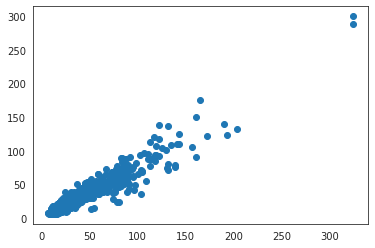

In [21]:
shapes = array([x.shape for x in image_list]).T
scatter(shapes[0], shapes[1])
print(image_list[0].shape)

In [22]:
print(mean(shapes[:2],1))
print(image_list[0].shape[:2])

[35.4612069  27.83333333]
(26, 14)


In [0]:
from skimage.transform import rescale
from skimage import data

In [0]:
def resize(im,X=35,Y=28):
    i = im.shape[0]/float(im.shape[1]) >= 1.25
    test_im = cv2.resize(im, dsize=(28, 35), interpolation=cv2.INTER_CUBIC)
    
    return test_im.astype(uint8)

In [0]:
adjusted_im = array([resize(x) for x in image_list])

In [26]:
adjusted_im2 = append(adjusted_im, array([x[:,:,[1,0,2]] for x in adjusted_im]), 0)
one_hot_labels2 = append(one_hot_labels, one_hot_labels, 0)
one_hot_labels2.shape

(2784, 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1392 + 1) instead
  """


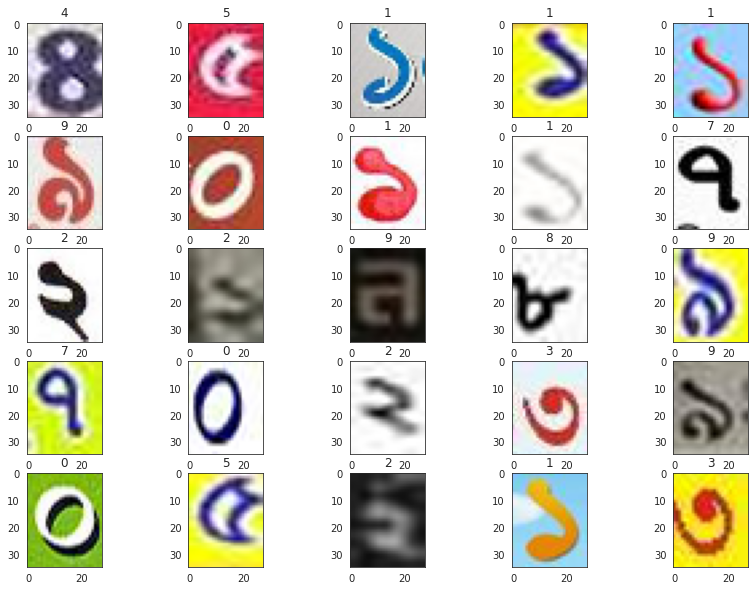

In [27]:
fig, ax = subplots(5,5, figsize = (14, 10))

for x in range(5):
    for y in range(5):
        rn = random_integers(0, len(adjusted_im))
        ax[x,y].imshow(adjusted_im[rn])
        ax[x,y].set_title(labels.label.iloc[rn])
show()

In [0]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import keras.backend as K

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [0]:
K.clear_session()

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Dropout(0.3, input_shape=((35, 28, 3))))
model.add(Conv2D(32, (3, 3), input_shape=(35, 28, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

In [0]:
model.add(Flatten())  #3D feature maps to 1D feature vectors
model.add(Dense(64, kernel_regularizer= 'l2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer= 'l2'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'],)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 35, 28, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 26, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 33, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 11, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 11, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 5, 32)         

In [0]:
X_train, X_test, y_train, y_test = train_test_split(adjusted_im2, one_hot_labels2, test_size = .2)

In [36]:
%%time
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = False)


CPU times: user 6min 18s, sys: 11.6 s, total: 6min 30s
Wall time: 3min 26s


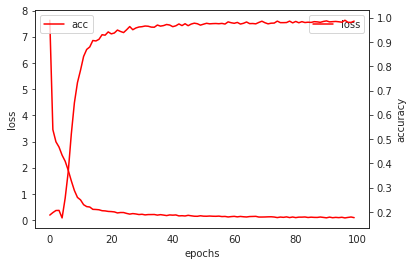

In [37]:
figure()
xlabel('epochs')
plot(hist.history['loss'],'r')
ylabel('loss')
legend(['loss'])
twinx(gca())
plot(hist.history['accuracy'], 'r')
ylabel('accuracy')
legend(['acc'])
show()

In [39]:
print('loss, accuracy = ', model.evaluate(X_test, y_test))

557/557 [==============================] - 0s 304us/step
loss, accuracy =  [0.160150315886768, 0.9838420152664185]
